<a href="https://colab.research.google.com/github/Laxman007/ColabData/blob/master/Temperature_plotting_using_plt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [0]:
df = pd.read_csv('Local_Weather_Data.csv')
df = df[['DateTime','TempOut']]
df["DateTime"]=df["DateTime"].apply(lambda x: x[:2]+x[6:10])

In [0]:
import numpy as np
data = []
for group,frame in df.groupby('DateTime'):
    #print(frame['TempOut'])
    avg = np.max(frame['TempOut'])
    mins = np.min(frame['TempOut'])
    data.append([group,mins,avg])

In [0]:
df = pd.DataFrame(data,columns=['Date','Min','Max'])

In [0]:
months = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']

In [0]:
df=df.loc[[0,2,4,6,7,8,10,12,14,16,18,20],:].reset_index()

In [0]:
del df['index']

In [0]:
for i in range(0,len(df)):
    df['Date'].replace( df['Date'][i],months[i],inplace=True)

In [0]:
fig, (ax1) = plt.subplots(1, 1, sharex=True)

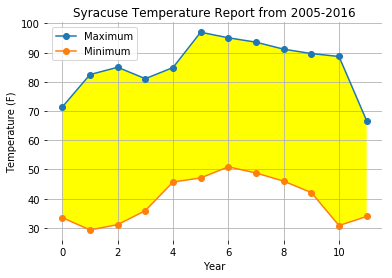

In [0]:
ax1.plot(df['Max'],'-o',df['Min'],'-o')
ax1.legend(['Maximum', 'Minimum'])
ax1.fill_between(range(len(df['Date'])), df['Max'], df['Min'] ,facecolor='yellow', interpolate=True)
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.title('Syracuse Temperature Report from 2005-2016')
plt.grid(True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()
plt.savefig('week2.png')